In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load dataset 
path = 'application_train.csv'
df = pd.read_csv(path, index_col=0)
df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    tipe_data_kolom = df.dtypes
    print(tipe_data_kolom)

TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


## EDA

In [4]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,NaN,NaN,NaN,0.007,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,NaN,NaN,NaN,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,NaN,NaN,NaN,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,NaN,NaN,NaN,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [6]:
df.duplicated().sum()

0

In [7]:
df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [10]:
numerical.info(verbose=True, max_cols=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 105 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    TARGET                        307511 non-null  int64  
 1    CNT_CHILDREN                  307511 non-null  int64  
 2    AMT_INCOME_TOTAL              307511 non-null  float64
 3    AMT_CREDIT                    307511 non-null  float64
 4    AMT_ANNUITY                   307499 non-null  float64
 5    AMT_GOODS_PRICE               307233 non-null  float64
 6    REGION_POPULATION_RELATIVE    307511 non-null  float64
 7    DAYS_BIRTH                    307511 non-null  int64  
 8    DAYS_EMPLOYED                 307511 non-null  int64  
 9    DAYS_REGISTRATION             307511 non-null  float64
 10   DAYS_ID_PUBLISH               307511 non-null  int64  
 11   OWN_CAR_AGE                   104582 non-null  float64
 12   FLAG_MOBIL             

In [11]:
numerical.iloc[:, 0:50].isnull().sum()

TARGET                               0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY   

In [12]:
numerical.iloc[:, 50:105].isnull().sum()

ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE                 154350
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAREA_MODE              169682
APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI               179943
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BUILD_MEDI                204488
COMMONAREA_MEDI                 214865
ELEVATORS_MEDI                  163891
ENTRANCES_MEDI                  154828
FLOORSMAX_MEDI                  153020
FLOORSMIN_MEDI                  208642
LANDAREA_MEDI                   182590
LIVINGAPARTMENTS_MEDI           210199
LIVINGAREA_MEDI                 154350
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAREA_MEDI              169682
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE 

In [13]:
numerical.iloc[:, 0:50].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [14]:
numerical.iloc[:, 50:105].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ELEVATORS_MODE,143620.0,0.074490,0.132256,0.0,0.0000,0.0000,0.1208,1.0
ENTRANCES_MODE,152683.0,0.145193,0.100977,0.0,0.0690,0.1379,0.2069,1.0
FLOORSMAX_MODE,154491.0,0.222315,0.143709,0.0,0.1667,0.1667,0.3333,1.0
FLOORSMIN_MODE,98869.0,0.228058,0.161160,0.0,0.0833,0.2083,0.3750,1.0
LANDAREA_MODE,124921.0,0.064958,0.081750,0.0,0.0166,0.0458,0.0841,1.0
LIVINGAPARTMENTS_MODE,97312.0,0.105645,0.097880,0.0,0.0542,0.0771,0.1313,1.0
LIVINGAREA_MODE,153161.0,0.105975,0.111845,0.0,0.0427,0.0731,0.1252,1.0
NONLIVINGAPARTMENTS_MODE,93997.0,0.008076,0.046276,0.0,0.0000,0.0000,0.0039,1.0
NONLIVINGAREA_MODE,137829.0,0.027022,0.070254,0.0,0.0000,0.0011,0.0231,1.0
APARTMENTS_MEDI,151450.0,0.117850,0.109076,0.0,0.0583,0.0864,0.1489,1.0


In [15]:
categorical.describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [16]:
categorical.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [17]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE          

In [18]:
status_counts = df["TARGET"].value_counts()

# Print the value counts
print(status_counts)

0    282686
1     24825
Name: TARGET, dtype: int64


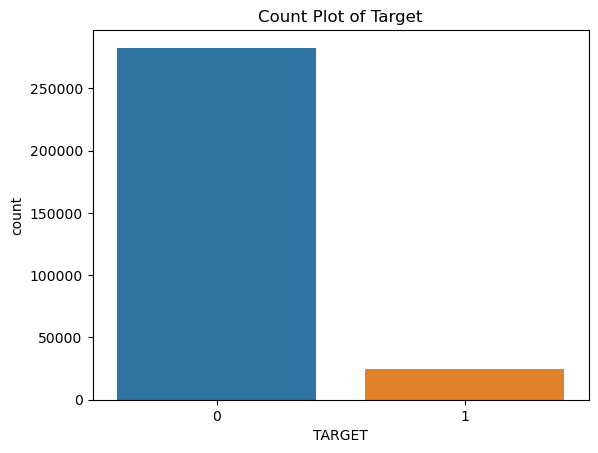

In [19]:
sns.countplot(x="TARGET", data=df)

# Memberikan judul pada plot
plt.title("Count Plot of Target")

# Menampilkan plot
plt.show()

In [20]:
# menghitung jumlah nilai yang hilang pada setiap kolom
missing_counts = df.isnull().sum()

# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df.isnull().mean() * 100

# menggabungkan kedua series menjadi satu dataframe
missing_data = pd.concat([missing_counts, missing_percentages], axis=1, keys=['Jumlah', 'Persentase'])

# mengurutkan dataframe berdasarkan jumlah missing value dari yang terbesar
missing_data = missing_data.sort_values(by='Jumlah', ascending=False)

# menampilkan dataframe yang berisi jumlah dan persentase missing value pada setiap kolom yang sudah diurutkan
print(missing_data)

                            Jumlah  Persentase
COMMONAREA_AVG              214865   69.872297
COMMONAREA_MODE             214865   69.872297
COMMONAREA_MEDI             214865   69.872297
NONLIVINGAPARTMENTS_AVG     213514   69.432963
NONLIVINGAPARTMENTS_MODE    213514   69.432963
...                            ...         ...
REGION_POPULATION_RELATIVE       0    0.000000
NAME_HOUSING_TYPE                0    0.000000
NAME_FAMILY_STATUS               0    0.000000
NAME_EDUCATION_TYPE              0    0.000000
TARGET                           0    0.000000

[121 rows x 2 columns]


In [21]:
# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df.isnull().mean() * 100

# menghapus kolom dengan persentase missing value lebih dari 45%
df = df.loc[:, missing_percentages < 45]

# menampilkan dataset setelah kolom yang tidak diinginkan dihapus
df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# menghitung jumlah nilai yang hilang pada setiap kolom
missing_counts = df.isnull().sum()

# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df.isnull().mean() * 100

# menggabungkan kedua series menjadi satu dataframe
missing_data = pd.concat([missing_counts, missing_percentages], axis=1, keys=['Jumlah', 'Persentase'])

# mengurutkan dataframe berdasarkan jumlah missing value dari yang terbesar
missing_data = missing_data.sort_values(by='Jumlah', ascending=False)

# menampilkan dataframe yang berisi jumlah dan persentase missing value pada setiap kolom yang sudah diurutkan
print(missing_data)

                             Jumlah  Persentase
OCCUPATION_TYPE               96391   31.345545
EXT_SOURCE_3                  60965   19.825307
AMT_REQ_CREDIT_BUREAU_DAY     41519   13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    41519   13.501631
...                             ...         ...
REG_REGION_NOT_WORK_REGION        0    0.000000
LIVE_REGION_NOT_WORK_REGION       0    0.000000
REG_CITY_NOT_LIVE_CITY            0    0.000000
NAME_CONTRACT_TYPE                0    0.000000
REG_CITY_NOT_WORK_CITY            0    0.000000

[72 rows x 2 columns]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 

In [24]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DO

In [25]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


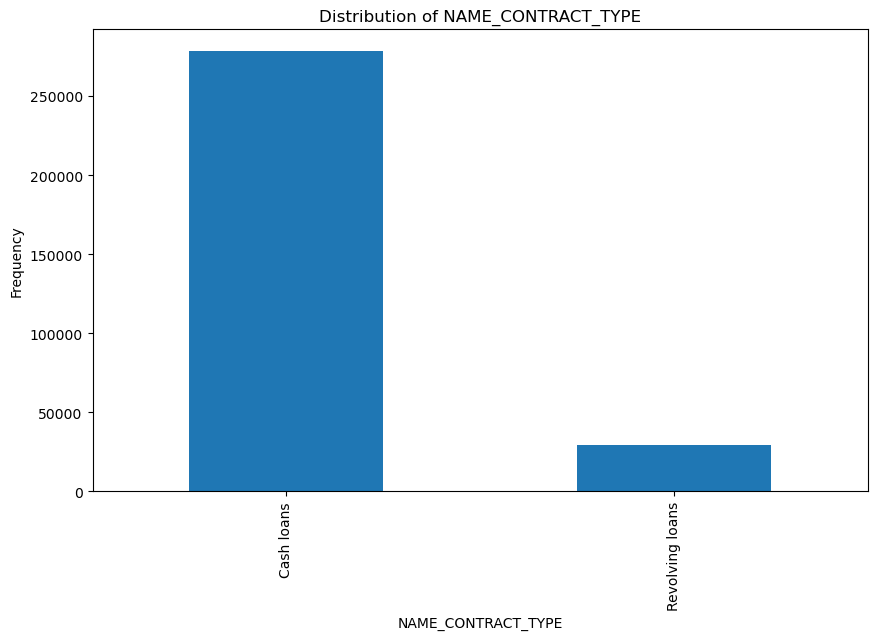

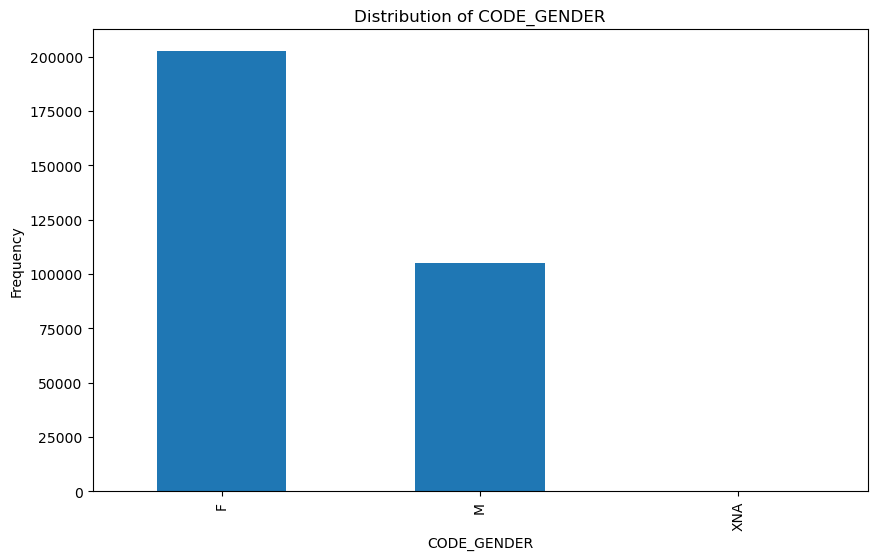

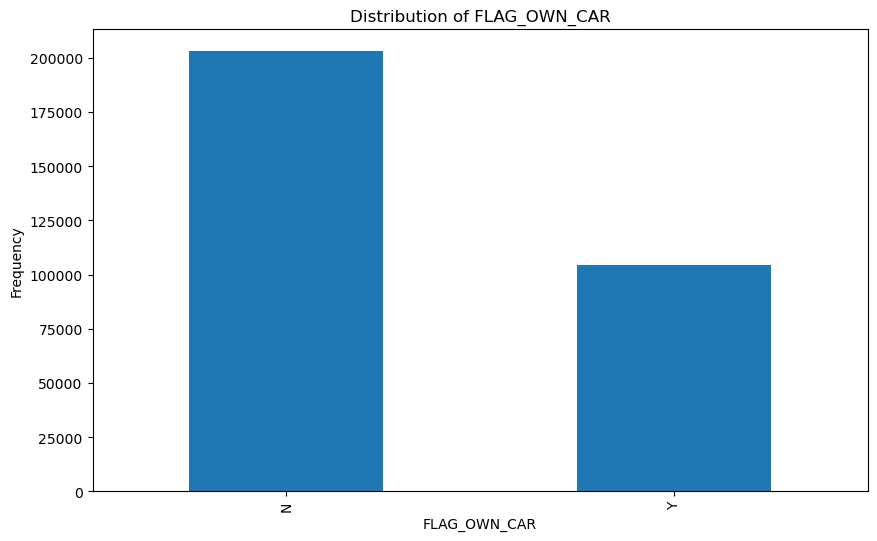

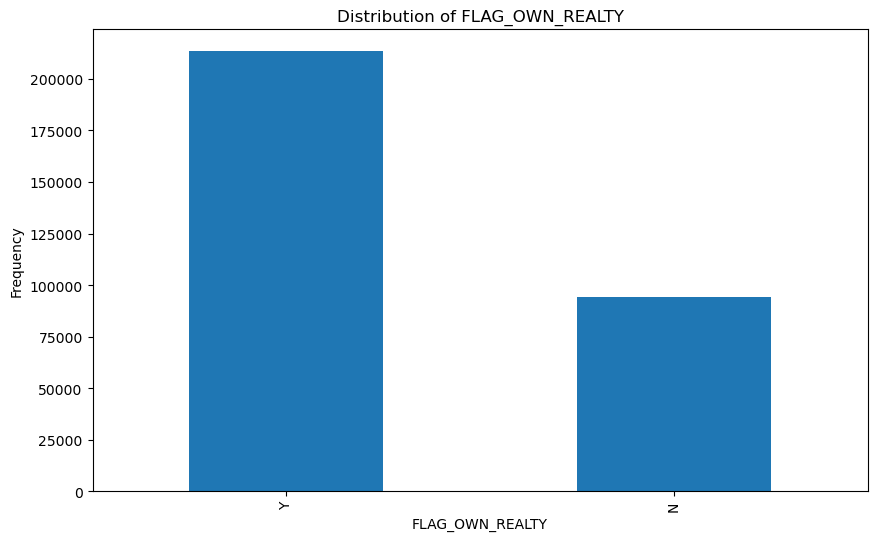

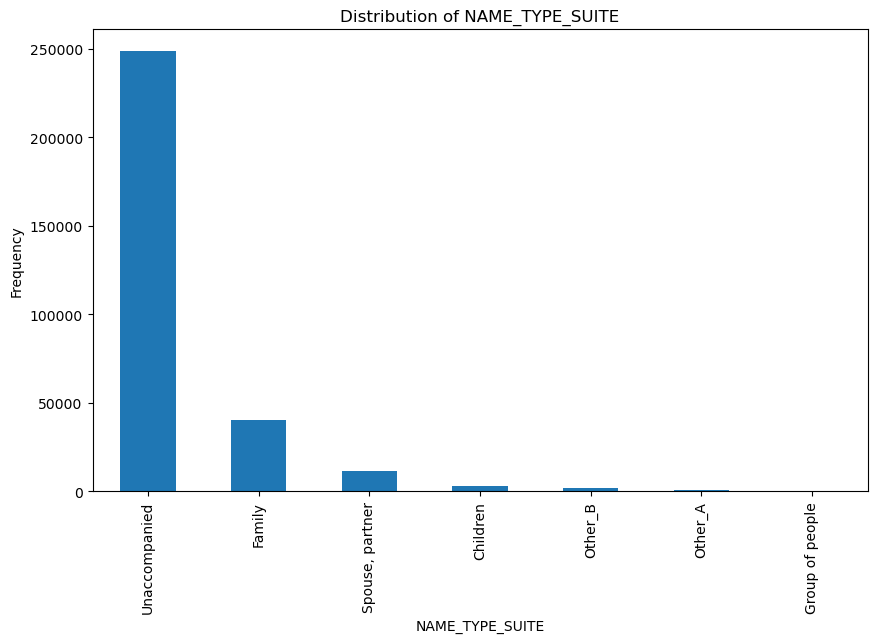

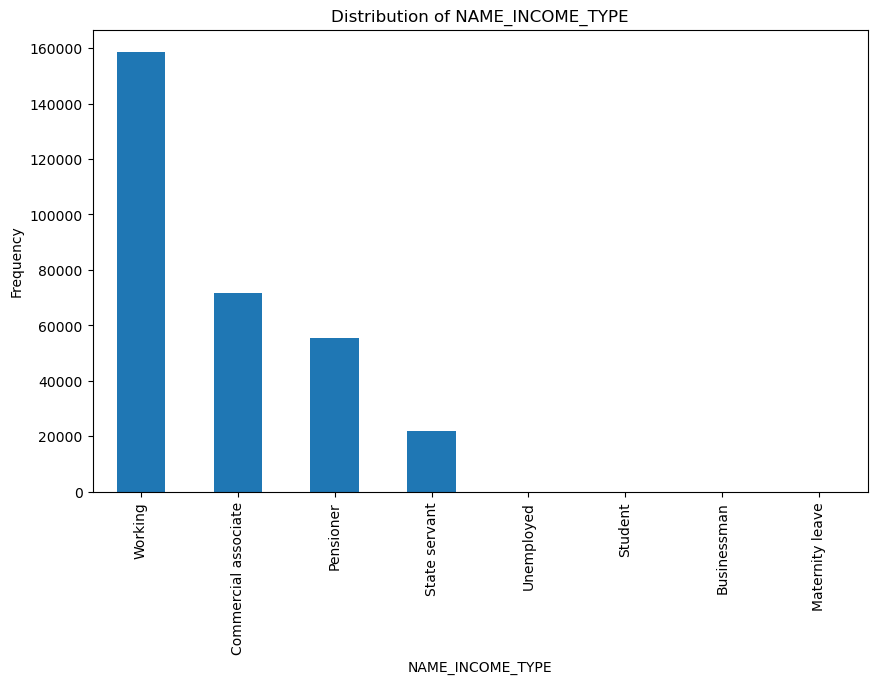

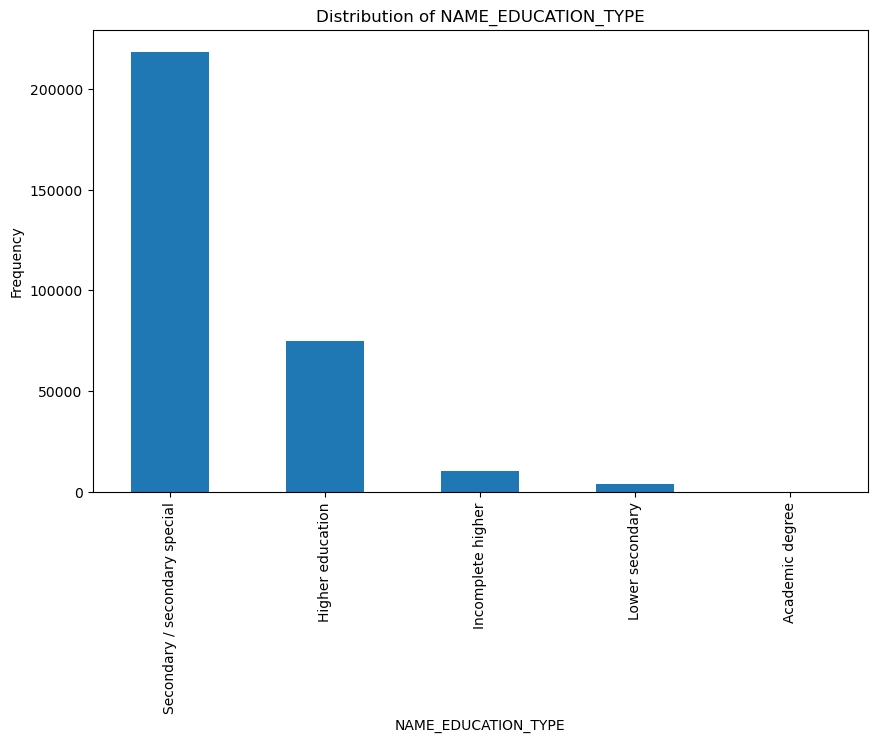

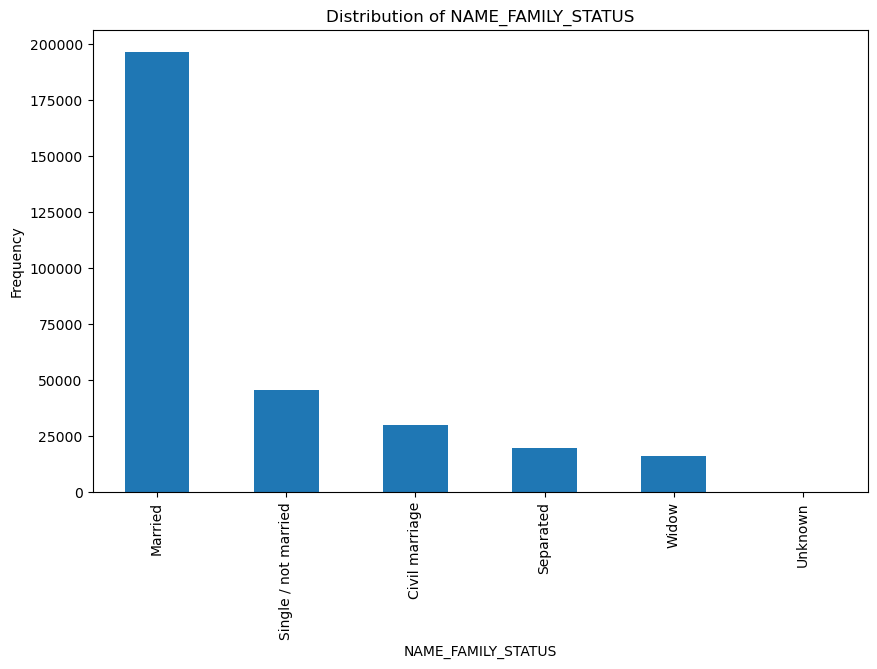

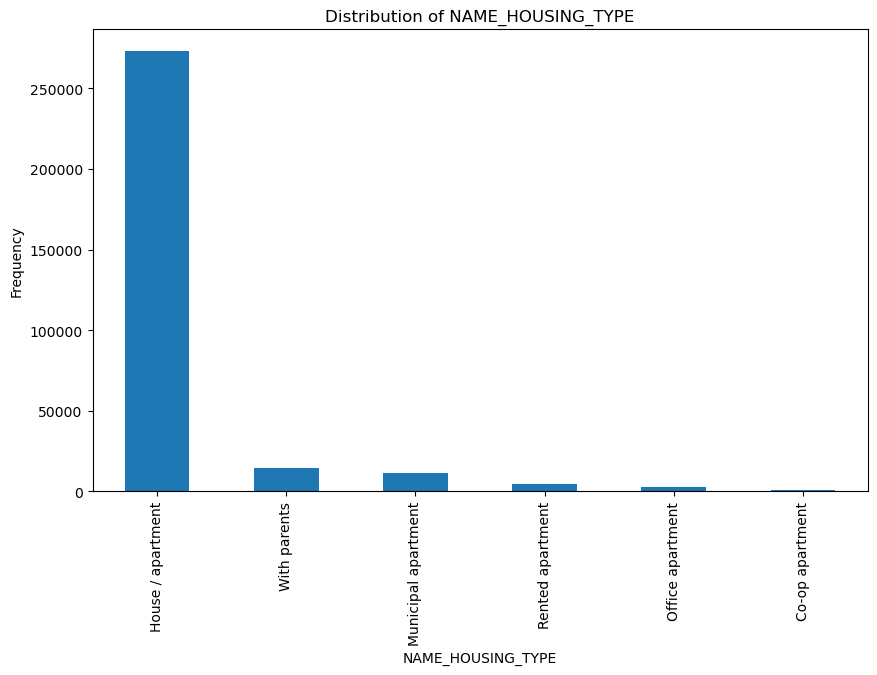

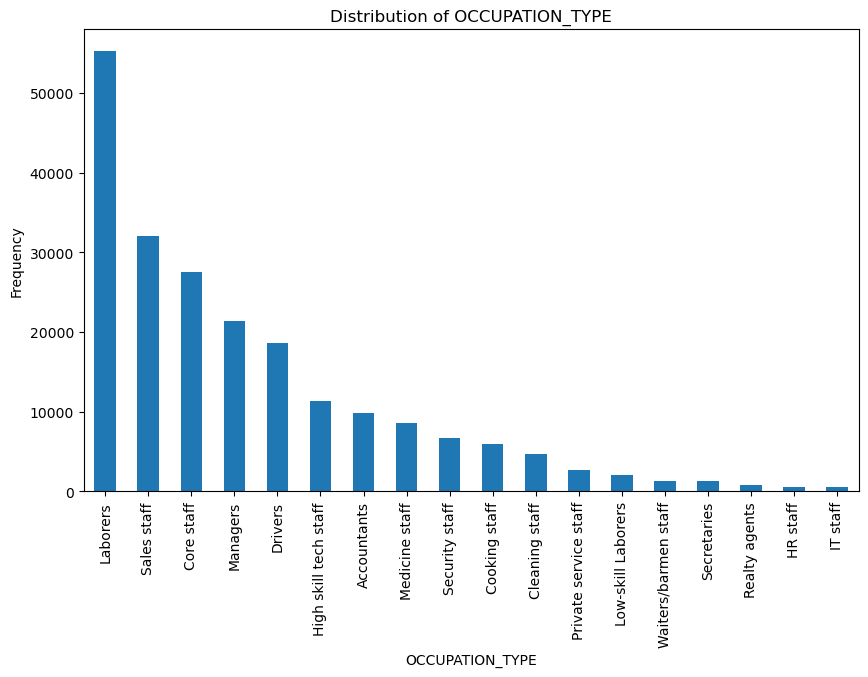

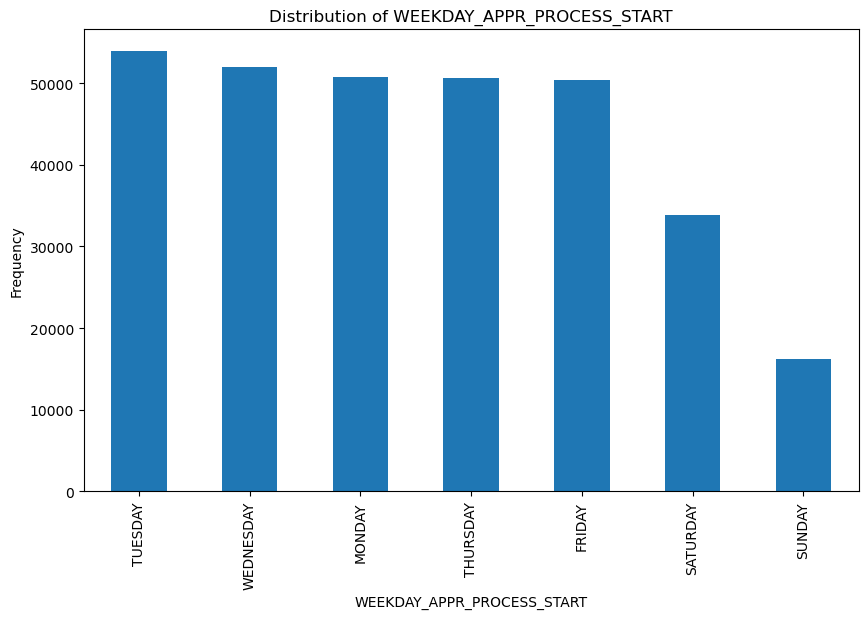

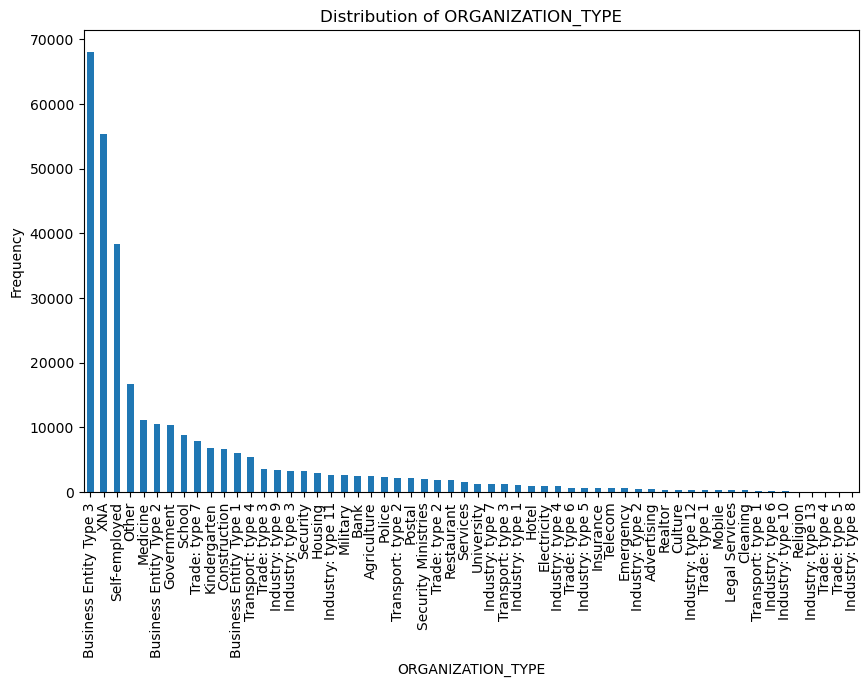

In [26]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

In [27]:
# Menghitung jumlah kolom dengan tipe data numerik dan objek
numeric_count = df.select_dtypes(include=['int64', 'float64']).shape[1]
object_count = df.select_dtypes(include='object').shape[1]

print("Jumlah kolom numerik:", numeric_count)
print("Jumlah kolom objek:", object_count)

Jumlah kolom numerik: 60
Jumlah kolom objek: 12


In [28]:
# Menghitung korelasi antara kolom numerik dengan "TARGET"
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_columns].corr()['TARGET'].sort_values(ascending=False)

print(correlations)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709
LIVE_REGION_NOT_WORK_REGION    0.002819


In [29]:
# Menampilkan nilai unik dalam kolom-kolom objek
object_columns = df.select_dtypes(include='object').columns
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Kolom '{column}':")
    print(unique_values)
    print()

Kolom 'NAME_CONTRACT_TYPE':
['Cash loans' 'Revolving loans']

Kolom 'CODE_GENDER':
['M' 'F' 'XNA']

Kolom 'FLAG_OWN_CAR':
['N' 'Y']

Kolom 'FLAG_OWN_REALTY':
['Y' 'N']

Kolom 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Kolom 'NAME_INCOME_TYPE':
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Kolom 'NAME_EDUCATION_TYPE':
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Kolom 'NAME_FAMILY_STATUS':
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Kolom 'NAME_HOUSING_TYPE':
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Kolom 'OCCUPATION_TYPE':
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'M

In [30]:
# Menampilkan statistik deskriptif untuk kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_stats = df[numeric_columns].describe()

print(numeric_stats)

              TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.0

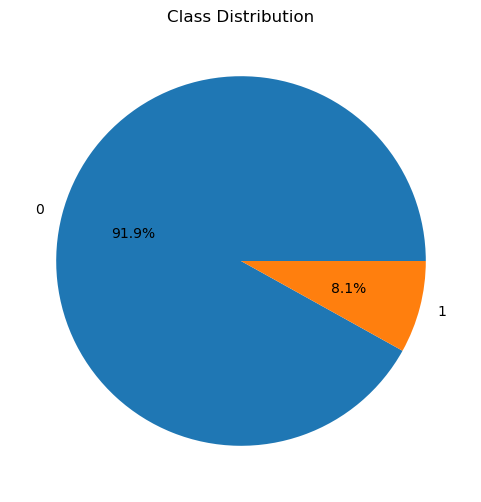

In [31]:
# Menghitung jumlah sampel pada setiap kelas
class_counts = df['TARGET'].value_counts()

# Menampilkan diagram pie proporsi kelas
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

## Boxplot & Distplot

In [32]:
numerical.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DO

In [33]:
num = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

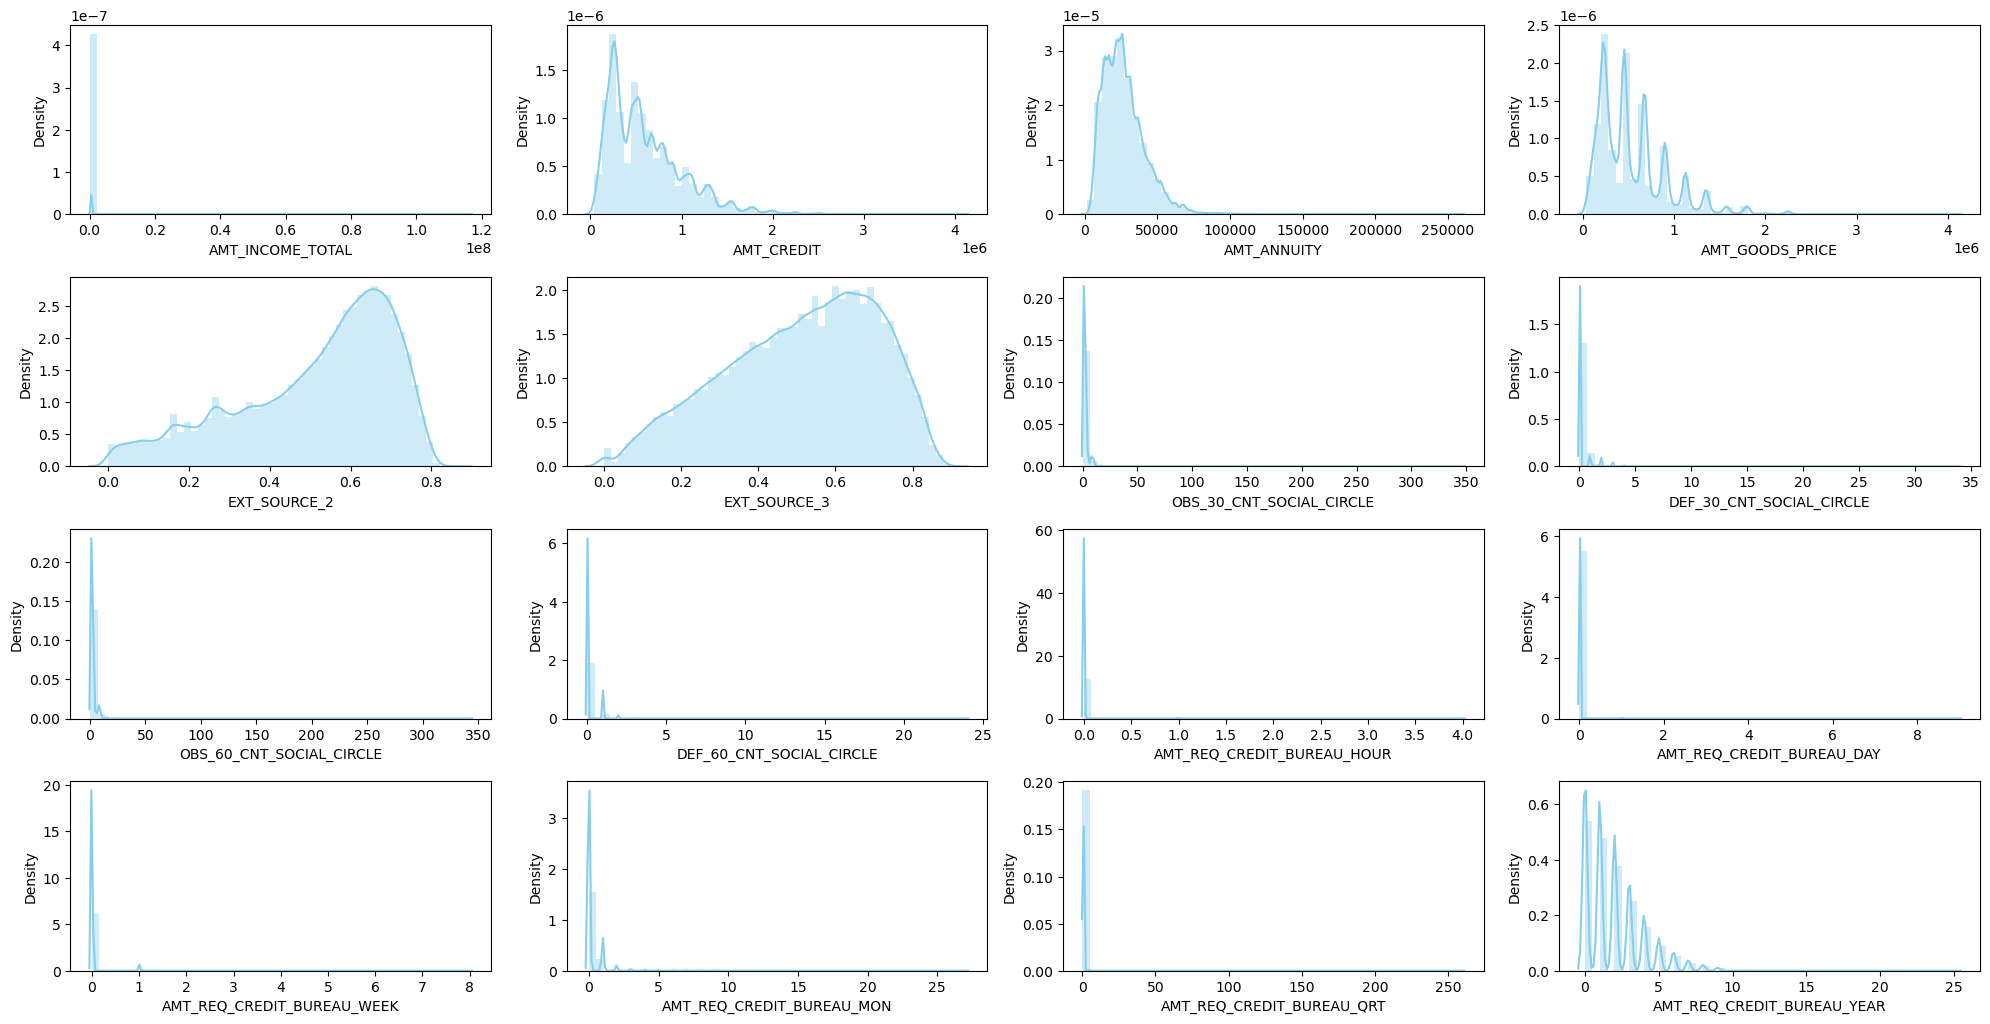

In [34]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.distplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

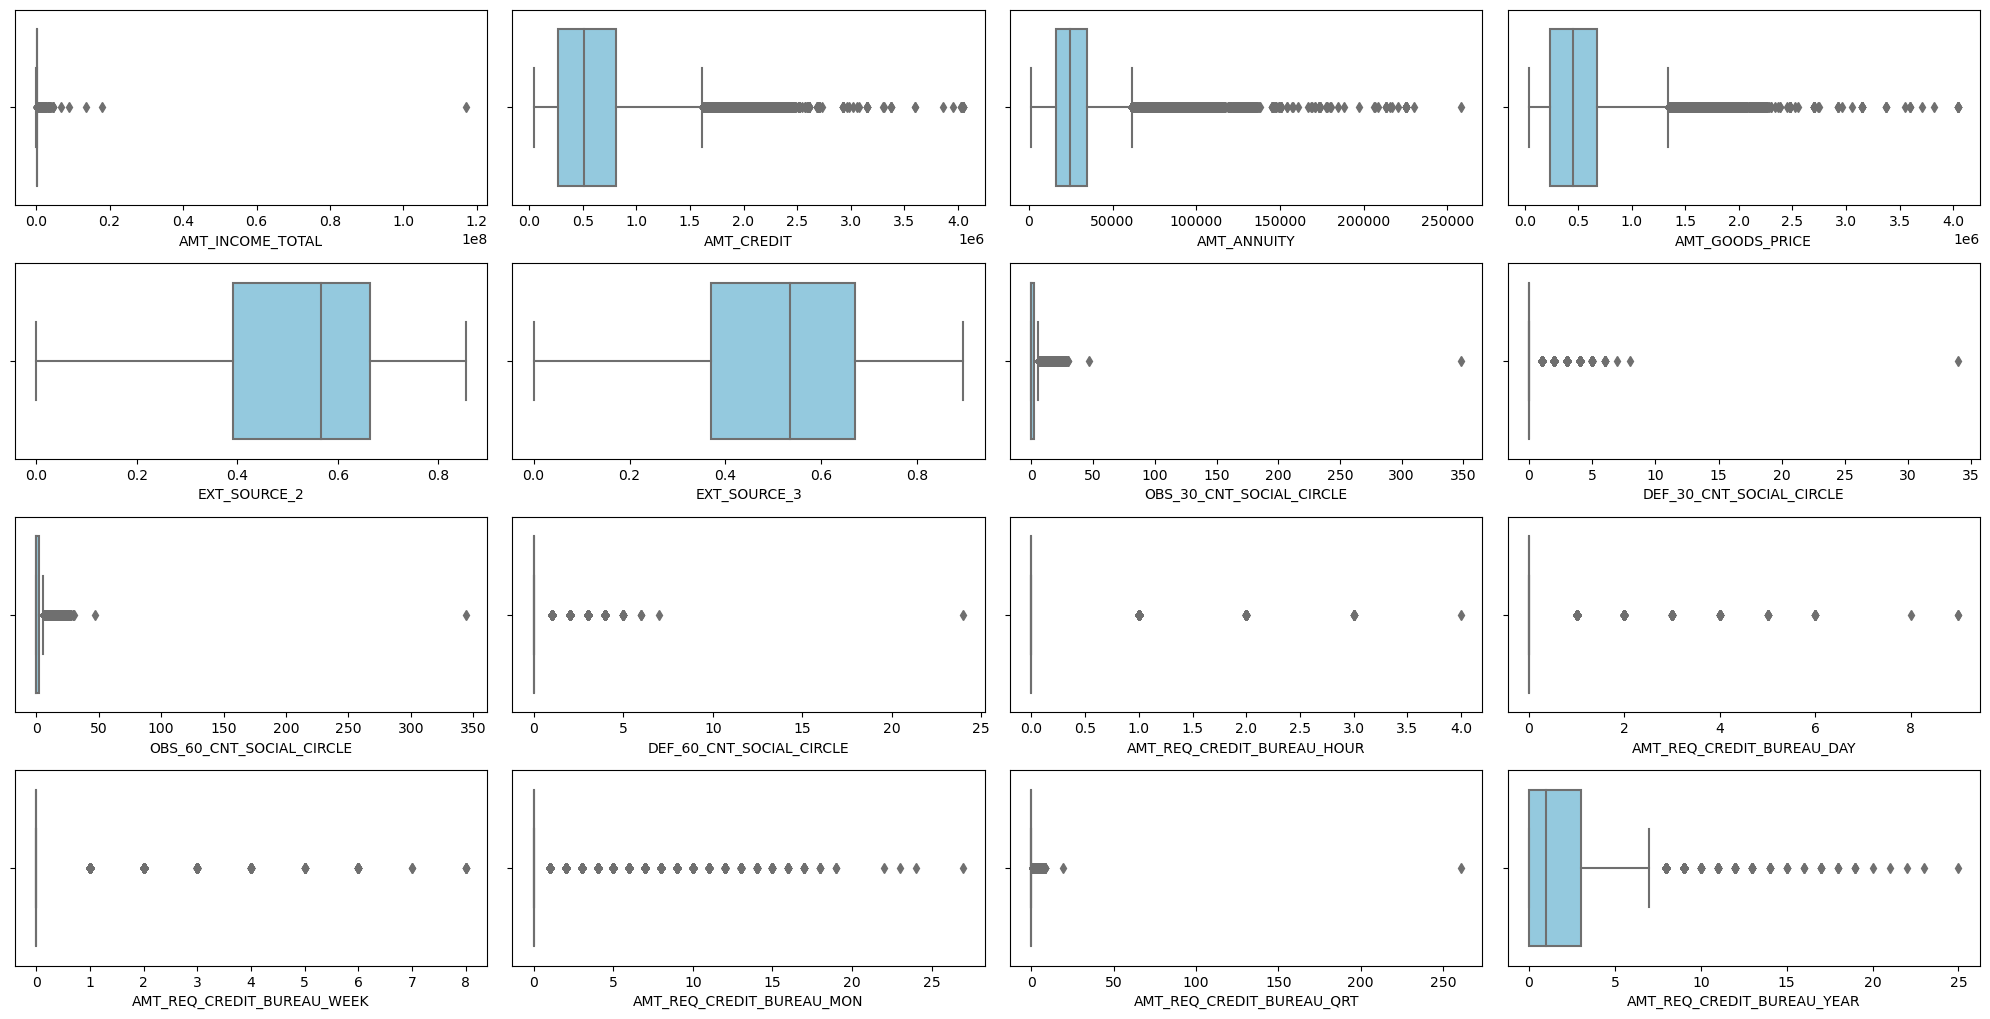

In [35]:
plt.figure(figsize=(20,20))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

## Data Preprocessing

### Negative value handling

In [36]:
features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',  'DAYS_LAST_PHONE_CHANGE']

# Melakukan transformasi nilai negatif menjadi positif pada fitur-fitur yang dipilih
for feature in features:
    df[feature] = np.abs(df[feature])

### Missing Value Imputation

In [37]:
# kolom-kolom non-numerik
num = df.select_dtypes(include='number').columns.tolist()

# kolom-kolom non-numerik
cat = df.select_dtypes(exclude='number').columns.tolist()

# mengisi nilai yang hilang dengan median pada kolom numerik
for col in num:
    df[col].fillna(df[col].median(), inplace=True)

# mengisi nilai yang hilang dengan modus pada kolom non-numerik
for col in cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [38]:
df.isnull().values.any()

False

In [39]:
df_clean = df.copy()
df_clean.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Categorical Feature Process

In [40]:
cat = df_clean.select_dtypes(exclude=[np.number])
cat.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992


In [41]:
for i in cat:
  print('-----'*10)
  print(i)
  print(df_clean[i].value_counts())

--------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------------------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
--------------------------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State se

### Change Value in CODE_GENDER and ORGANIZATION_TYPE with Mode

In [42]:
df_clean['CODE_GENDER'] = df_clean['CODE_GENDER'].replace(['XNA'], df_clean['CODE_GENDER'].mode()[0])
df_clean['ORGANIZATION_TYPE'] = df_clean['ORGANIZATION_TYPE'].replace(['XNA'], df_clean['ORGANIZATION_TYPE'].mode()[0])

Rata-rata pendapatan pelamar: 168797.9192969845
Pendapatan tertinggi: 117000000.0
Pendapatan terendah: 25650.0


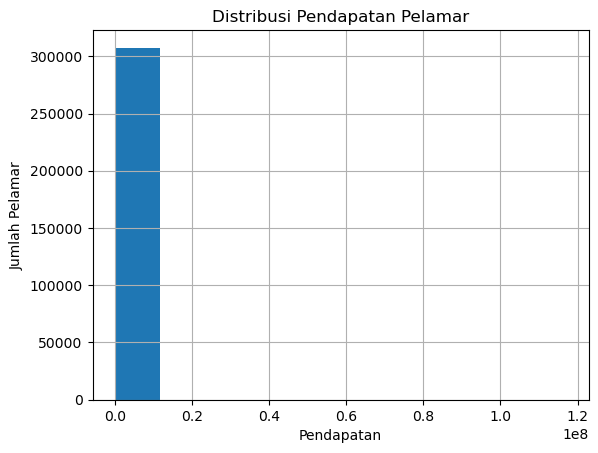

In [43]:
# Rata-rata pendapatan pelamar
mean_income = df['AMT_INCOME_TOTAL'].mean()
print("Rata-rata pendapatan pelamar:", mean_income)

# Pendapatan tertinggi
max_income = df['AMT_INCOME_TOTAL'].max()
print("Pendapatan tertinggi:", max_income)

# Pendapatan terendah
min_income = df['AMT_INCOME_TOTAL'].min()
print("Pendapatan terendah:", min_income)

# Distribusi pendapatan pelamar
df['AMT_INCOME_TOTAL'].hist()
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelamar')
plt.title('Distribusi Pendapatan Pelamar')
plt.show()

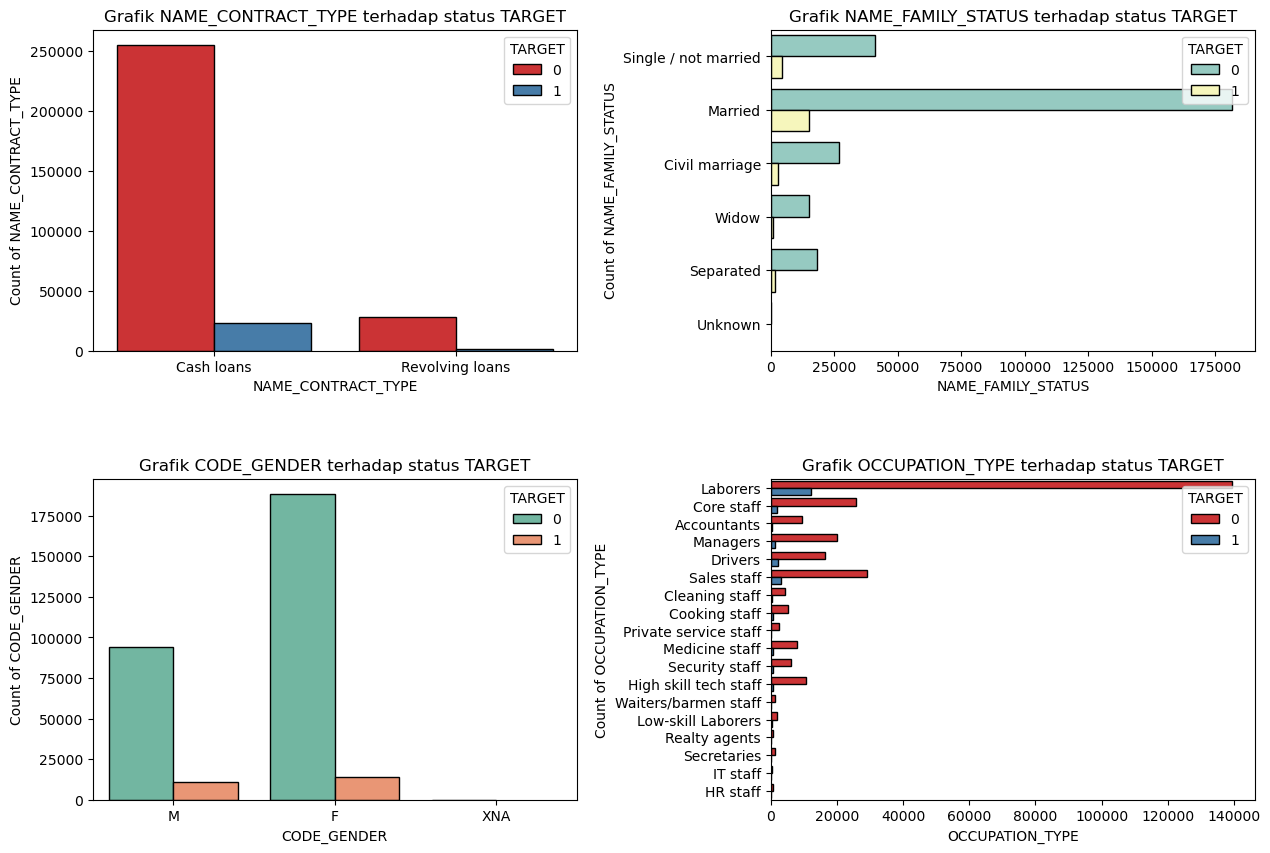

In [44]:
fig, (axs) = plt.subplots(2, 2, figsize=(15, 10))

# Create first countplot on first subplot
sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=df, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[0, 0])
axs[0, 0].set_title("Grafik NAME_CONTRACT_TYPE terhadap status TARGET")
axs[0, 0].set_xlabel("NAME_CONTRACT_TYPE")
axs[0, 0].set_ylabel("Count of NAME_CONTRACT_TYPE")
axs[0, 0].legend(title="TARGET", loc="upper right")

# Create second countplot on second subplot
sns.countplot(y="NAME_FAMILY_STATUS", hue="TARGET", data=df, palette="Set3",
                   edgecolor="black", linewidth=1, ax=axs[0, 1])
axs[0, 1].set_title("Grafik NAME_FAMILY_STATUS terhadap status TARGET")
axs[0, 1].set_xlabel("NAME_FAMILY_STATUS")
axs[0, 1].set_ylabel("Count of NAME_FAMILY_STATUS")
axs[0, 1].legend(title="TARGET", loc="upper right")

# Create first countplot on first subplot
sns.countplot(x="CODE_GENDER", hue="TARGET", data=df, palette="Set2",
                   edgecolor="black", linewidth=1, ax=axs[1, 0])
axs[1, 0].set_title("Grafik CODE_GENDER terhadap status TARGET")
axs[1, 0].set_xlabel("CODE_GENDER")
axs[1, 0].set_ylabel("Count of CODE_GENDER")
axs[1, 0].legend(title="TARGET", loc="upper right")

# Create second countplot on second subplot
sns.countplot(y="OCCUPATION_TYPE", hue="TARGET", data=df, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[1, 1])
axs[1, 1].set_title("Grafik OCCUPATION_TYPE terhadap status TARGET")
axs[1, 1].set_xlabel("OCCUPATION_TYPE")
axs[1, 1].set_ylabel("Count of OCCUPATION_TYPE")
axs[1, 1].legend(title="TARGET", loc="upper right")

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

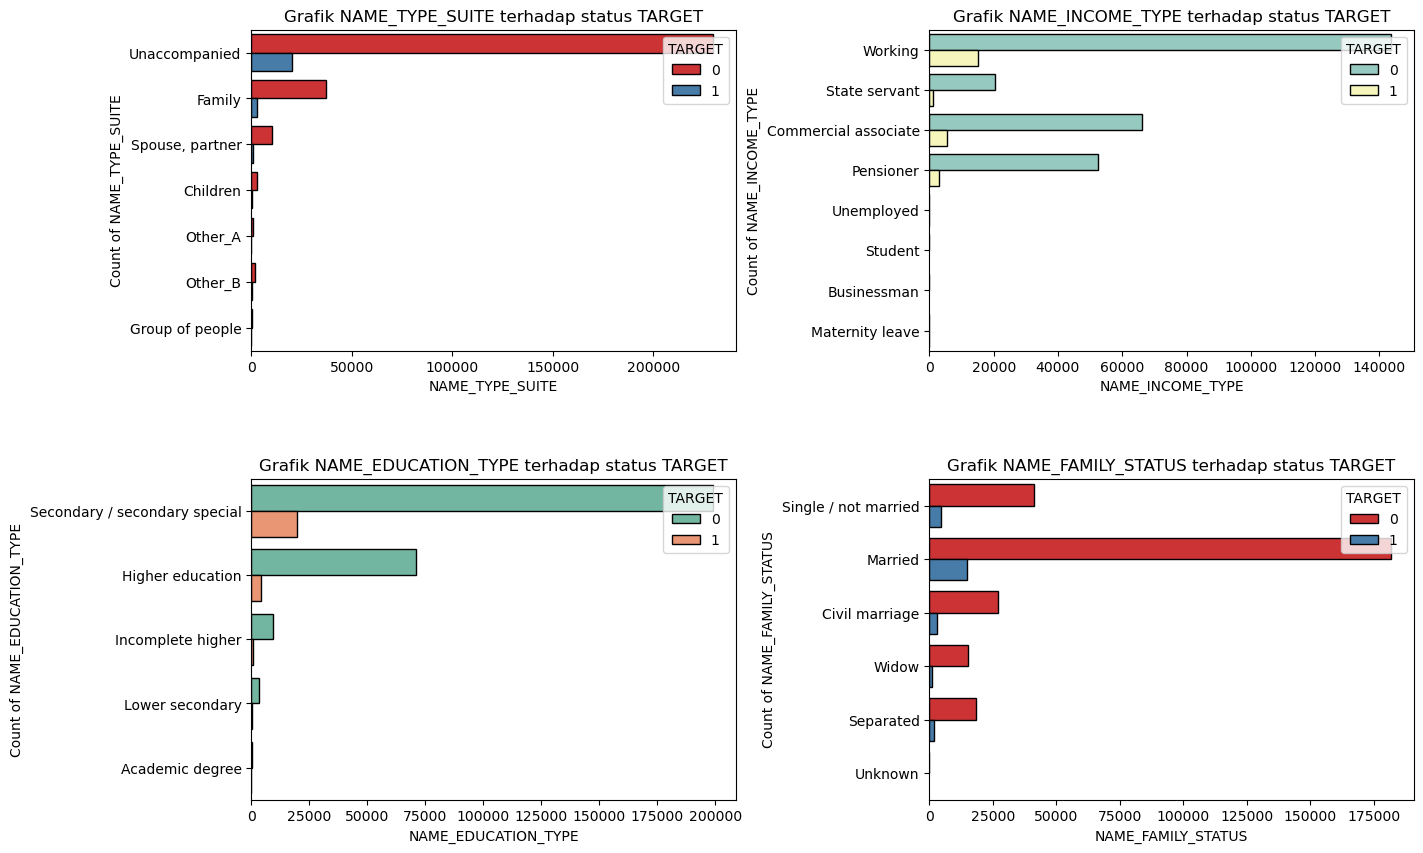

In [45]:
fig, (axs) = plt.subplots(2, 2, figsize=(15, 10))

# Create first countplot on first subplot
sns.countplot(y="NAME_TYPE_SUITE", hue="TARGET", data=df, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[0, 0])
axs[0, 0].set_title("Grafik NAME_TYPE_SUITE terhadap status TARGET")
axs[0, 0].set_xlabel("NAME_TYPE_SUITE")
axs[0, 0].set_ylabel("Count of NAME_TYPE_SUITE")
axs[0, 0].legend(title="TARGET", loc="upper right")

# Create second countplot on second subplot
sns.countplot(y="NAME_INCOME_TYPE", hue="TARGET", data=df, palette="Set3",
                   edgecolor="black", linewidth=1, ax=axs[0, 1])
axs[0, 1].set_title("Grafik NAME_INCOME_TYPE terhadap status TARGET")
axs[0, 1].set_xlabel("NAME_INCOME_TYPE")
axs[0, 1].set_ylabel("Count of NAME_INCOME_TYPE")
axs[0, 1].legend(title="TARGET", loc="upper right")

# Create first countplot on first subplot
sns.countplot(y="NAME_EDUCATION_TYPE", hue="TARGET", data=df, palette="Set2",
                   edgecolor="black", linewidth=1, ax=axs[1, 0])
axs[1, 0].set_title("Grafik NAME_EDUCATION_TYPE terhadap status TARGET")
axs[1, 0].set_xlabel("NAME_EDUCATION_TYPE")
axs[1, 0].set_ylabel("Count of NAME_EDUCATION_TYPE")
axs[1, 0].legend(title="TARGET", loc="upper right")

# Create second countplot on second subplot
sns.countplot(y="NAME_FAMILY_STATUS", hue="TARGET", data=df, palette="Set1",
                   edgecolor="black", linewidth=1, ax=axs[1, 1])
axs[1, 1].set_title("Grafik NAME_FAMILY_STATUS terhadap status TARGET")
axs[1, 1].set_xlabel("NAME_FAMILY_STATUS")
axs[1, 1].set_ylabel("Count of NAME_FAMILY_STATUS")
axs[1, 1].legend(title="TARGET", loc="upper right")

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()

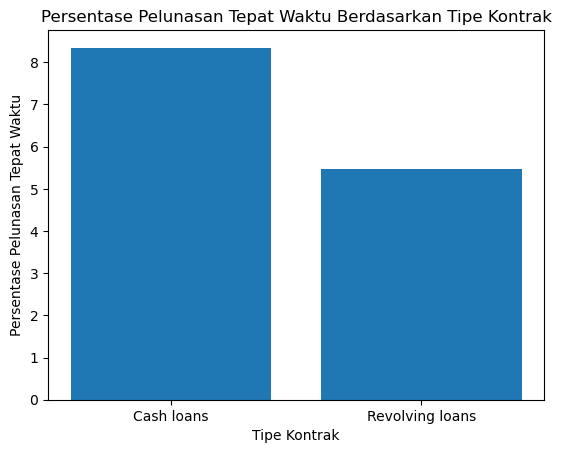

In [46]:
# Menghitung persentase pelunasan tepat waktu berdasarkan tipe kontrak
contract_type_percentages = df_clean.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100

# Menampilkan persentase pelunasan tepat waktu berdasarkan tipe kontrak
plt.bar(contract_type_percentages.index, contract_type_percentages.values)
plt.xlabel('Tipe Kontrak')
plt.ylabel('Persentase Pelunasan Tepat Waktu')
plt.title('Persentase Pelunasan Tepat Waktu Berdasarkan Tipe Kontrak')
plt.show()

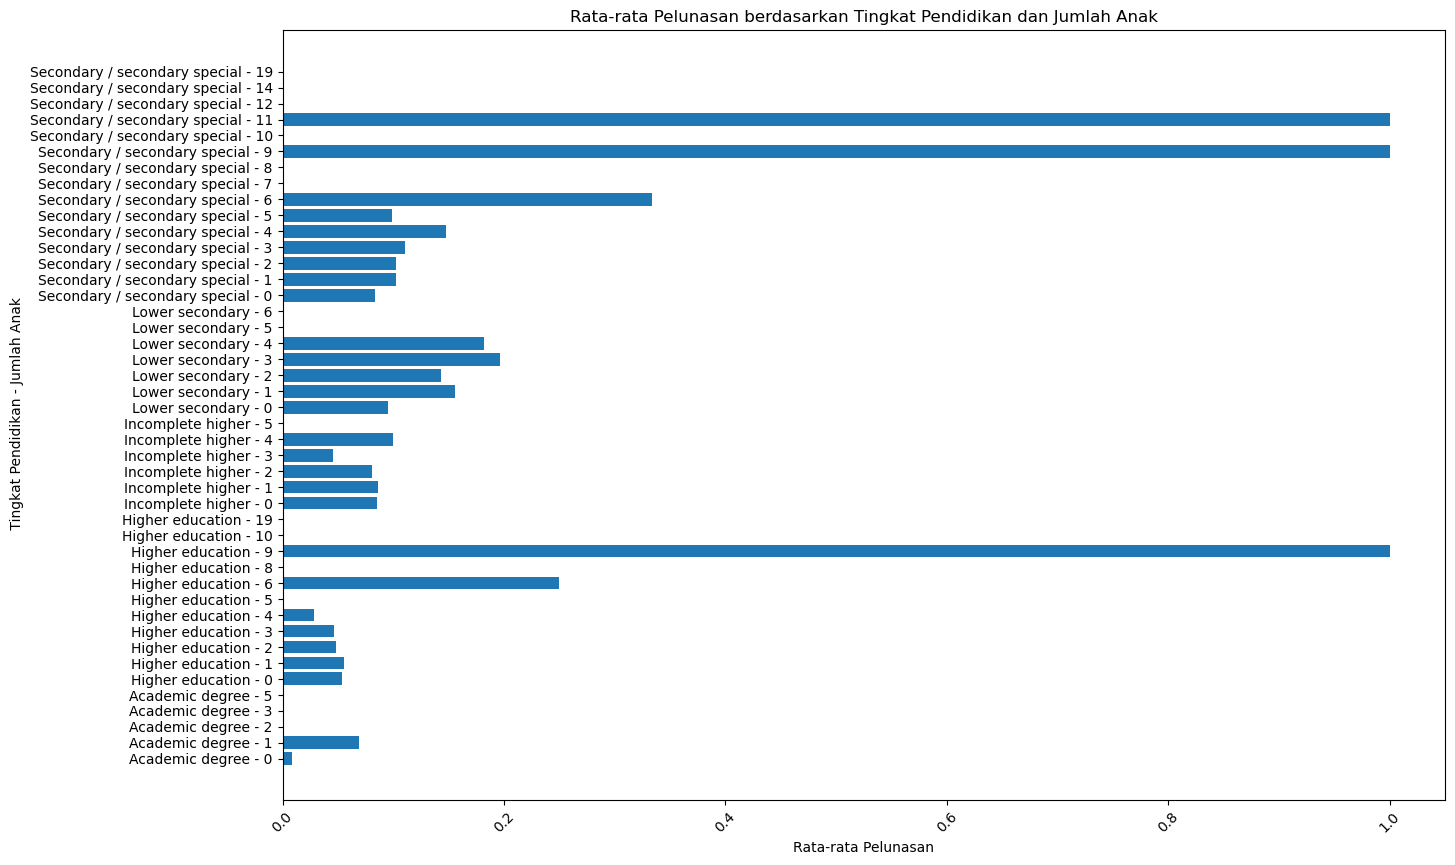

In [47]:
# Membuat subset data yang hanya berisi kolom yang diperlukan
subset_data = df_clean[['NAME_EDUCATION_TYPE', 'CNT_CHILDREN', 'TARGET']]

# Mengelompokkan data berdasarkan tingkat pendidikan dan jumlah anak, dan menghitung rata-rata pelunasan
grouped_data = subset_data.groupby(['NAME_EDUCATION_TYPE', 'CNT_CHILDREN']).mean().reset_index()

# Membuat plot batang untuk menampilkan rata-rata pelunasan
plt.figure(figsize=(15, 10))
plt.barh(grouped_data['NAME_EDUCATION_TYPE'] + ' - ' + grouped_data['CNT_CHILDREN'].astype(str), grouped_data['TARGET'])
plt.xlabel('Rata-rata Pelunasan')
plt.ylabel(' Tingkat Pendidikan - Jumlah Anak')
plt.title('Rata-rata Pelunasan berdasarkan Tingkat Pendidikan dan Jumlah Anak')
plt.xticks(rotation=45)
plt.show()

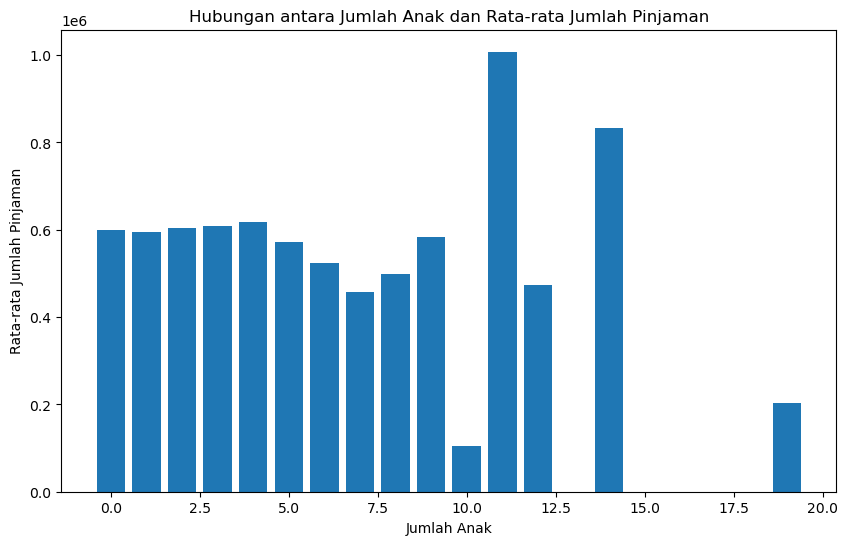

In [48]:
# Mengurutkan data berdasarkan jumlah anak
sorted_data = df_clean.sort_values('CNT_CHILDREN')

# Menghitung rata-rata jumlah pinjaman berdasarkan jumlah anak
avg_credit_by_children = sorted_data.groupby('CNT_CHILDREN')['AMT_CREDIT'].mean()

# Membuat plot bar untuk menampilkan hubungan antara jumlah anak dan rata-rata jumlah pinjaman
plt.figure(figsize=(10, 6))
plt.bar(avg_credit_by_children.index, avg_credit_by_children.values)
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata-rata Jumlah Pinjaman')
plt.title('Hubungan antara Jumlah Anak dan Rata-rata Jumlah Pinjaman')
plt.show()

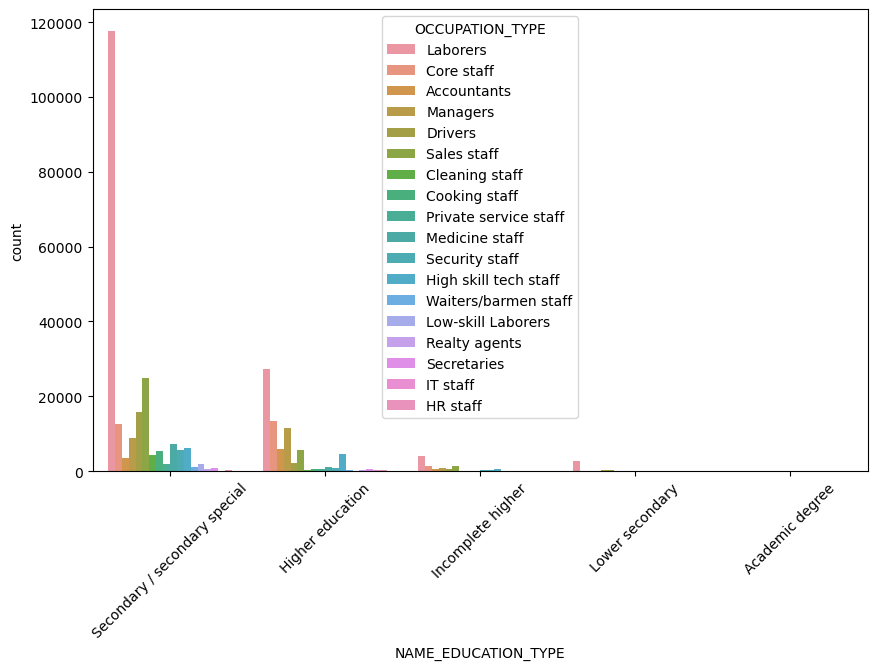

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='OCCUPATION_TYPE', data=df_clean)
plt.xticks(rotation=45)
plt.show()

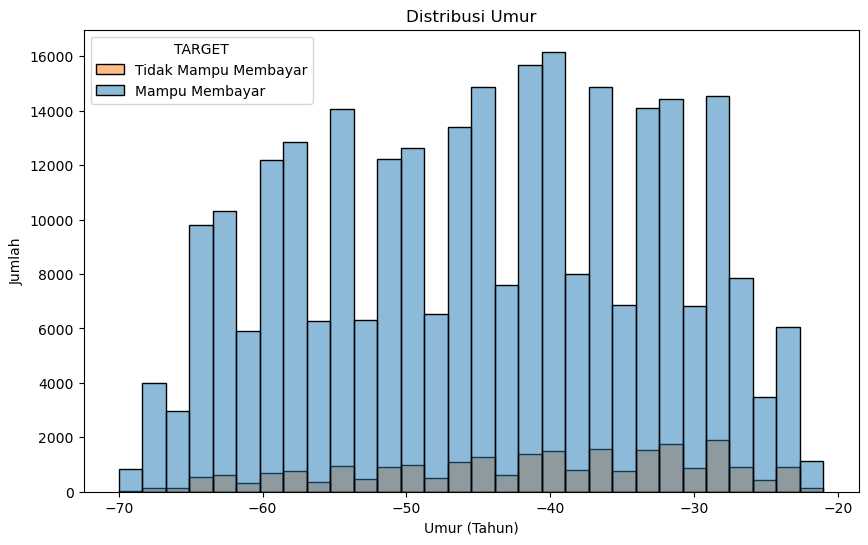

In [50]:
# Menghitung distribusi umur
df_clean['AGE'] = df_clean['DAYS_BIRTH'] // -365

# Visualisasi histogram umur berdasarkan TARGET
plt.figure(figsize=(10, 6))
sns.histplot(x='AGE', data=df_clean, hue='TARGET', bins=30)
plt.title('Distribusi Umur')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Jumlah')
plt.legend(title='TARGET', labels=['Tidak Mampu Membayar', 'Mampu Membayar'])
plt.show()

## Encoding

### Label Encoding

In [51]:
# Label Encoding for feature with 2 unique value

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_clean[['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']] = df_clean[['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']].apply(LabelEncoder().fit_transform)

### Frequency Encoding

In [52]:
# Frequency Encoding for feature with many unique value

# kolom-kolom categorical yang ingin di-encode
cat_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# encoding nilai kategori berdasarkan frekuensi kemunculan
for col in cat_cols:
    freq = df_clean[col].value_counts(normalize=True)
    df_clean[f'{col}_freq'] = df_clean[col].map(freq)

# menghapus kolom-kolom asli yang sudah di-encode
df_clean.drop(columns=cat_cols, inplace=True)

### One Hot Encoding

In [53]:
categorical1 = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
               'WEEKDAY_APPR_PROCESS_START']

for cat in categorical1:
    onehots = pd.get_dummies(df_clean[cat], prefix=cat)
    df_clean = df_clean.join(onehots)
    
# menghapus kolom-kolom asli yang sudah di-encode
df_clean.drop(columns=categorical1, inplace=True)

## Target Frequency

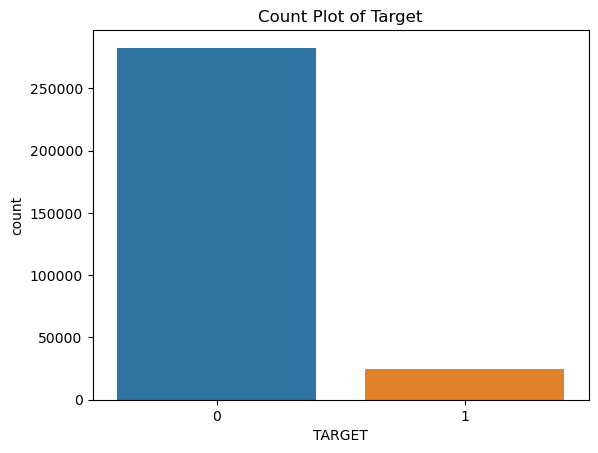

In [54]:
sns.countplot(x="TARGET", data=df_clean)

# Memberikan judul pada plot
plt.title("Count Plot of Target")

# Menampilkan plot
plt.show()

In [55]:
X = df_clean.drop(columns='TARGET') 
y = df_clean['TARGET'] 

print("Label shape:")
print(y.shape)

print("Features shape:")
print(X.shape)

Label shape:
(307511,)
Features shape:
(307511, 105)


## Feature Selection

In [56]:
from sklearn.ensemble import RandomForestClassifier

# membuat model Random Forest
model = RandomForestClassifier()

# mengekstrak tingkat kepentingan setiap fitur
model.fit(X, y)
importances = model.feature_importances_

In [57]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 20 feature importances:")
for i in range(20):
    print("%d. %s (%f)" % (i + 1, X.columns[indices[i]], importances[indices[i]]))


Top 20 feature importances:
1. EXT_SOURCE_2 (0.069699)
2. EXT_SOURCE_3 (0.063582)
3. DAYS_ID_PUBLISH (0.049550)
4. DAYS_REGISTRATION (0.049534)
5. DAYS_BIRTH (0.048297)
6. AMT_ANNUITY (0.045636)
7. DAYS_EMPLOYED (0.045321)
8. DAYS_LAST_PHONE_CHANGE (0.044191)
9. AMT_CREDIT (0.042092)
10. AMT_INCOME_TOTAL (0.037658)
11. REGION_POPULATION_RELATIVE (0.037277)
12. AMT_GOODS_PRICE (0.035551)
13. HOUR_APPR_PROCESS_START (0.032693)
14. AGE (0.032265)
15. ORGANIZATION_TYPE_freq (0.026138)
16. AMT_REQ_CREDIT_BUREAU_YEAR (0.023068)
17. OCCUPATION_TYPE_freq (0.020498)
18. OBS_30_CNT_SOCIAL_CIRCLE (0.017875)
19. OBS_60_CNT_SOCIAL_CIRCLE (0.017735)
20. CNT_FAM_MEMBERS (0.013790)


In [58]:
# Mengambil 20 fitur terpenting
top_20_features = X.columns[indices[:20]]

# Memilih kolom-kolom yang sesuai dari dataframe X
X = X[top_20_features]

# Menggunakan fitur TARGET sebagai label
y = df['TARGET']

## Scaling Data

In [59]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X)
X_std=model.transform(X)
 
# print scaled features
print(X_std)

[[0.30754227 0.15505445 0.29456718 ... 0.00574713 0.00581395 0.        ]
 [0.72777309 0.59716311 0.04043351 ... 0.00287356 0.00290698 0.05263158]
 [0.65018979 0.81413048 0.35167431 ... 0.         0.         0.        ]
 ...
 [0.62657536 0.24381478 0.71557593 ... 0.01724138 0.01744186 0.        ]
 [0.60136022 0.7375872  0.12935946 ... 0.         0.         0.05263158]
 [0.82873586 0.12663023 0.05696818 ... 0.         0.         0.05263158]]


## Split Data

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

In [61]:
# from sklearn.feature_selection import SelectKBest #feature selection
# from sklearn.feature_selection import chi2

# # feature selection
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(X_std,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
# featureScores.columns = ['Features', 'Score']
# print('The features that correlate well with target feature:\n')
# featureScores.sort_values(by=['Score'], ascending=False)

# Machine Learning Model

## Baseline

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [63]:
# evaluate the model on the training and testing data
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = dt.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 100.00%
Testing score: 84.94%
------------
Precision: 13.77%
Recall: 16.42%
F1 score: 14.98%
ROC AUC score: 53.69%


In [64]:
test_report = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56533
           1       0.14      0.16      0.15      4970

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.53     61503
weighted avg       0.86      0.85      0.86     61503



### Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train,y_train)

# evaluate the model on the training and testing data
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = rf_model.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 100.00%
Testing score: 91.95%
------------
Precision: 67.27%
Recall: 0.74%
F1 score: 1.47%
ROC AUC score: 50.36%


In [66]:
test_report = classification_report(y_true=y_test, y_pred=rf_model.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56533
           1       0.67      0.01      0.01      4970

    accuracy                           0.92     61503
   macro avg       0.80      0.50      0.49     61503
weighted avg       0.90      0.92      0.88     61503



### Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

# evaluate the model on the training and testing data
train_score = nb.score(X_train, y_train)
test_score = nb.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = nb.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 91.27%
Testing score: 91.23%
------------
Precision: 20.31%
Recall: 2.92%
F1 score: 5.10%
ROC AUC score: 50.96%


In [68]:
test_report = classification_report(y_true=y_test, y_pred=nb.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56533
           1       0.20      0.03      0.05      4970

    accuracy                           0.91     61503
   macro avg       0.56      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503



### Logistic Regression

In [69]:
# # hyperparameter tuning
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# log = LogisticRegression()

# params = {
#     'C': [0.1, 1.0, 10.0],  # Range of values for regularization parameter
#     'penalty': ['l1', 'l2'],  # Penalty types to consider
#     'solver': ['liblinear', 'saga'],  # Solver algorithms to consider
#     'fit_intercept': [True, False],  # Whether to include an intercept term
# #     'max_iter': [ 500,1000]  # Maximum number of iterations
# }

# # Perform grid search cross-validation
# log_gridcv = GridSearchCV(log, params, cv=5, scoring='accuracy')
# log_gridcv.fit(X, y)

# # Get the best hyperparameter configuration
# best_params = log_gridcv.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the final model using the best hyperparameters
# final_model = LogisticRegression(**best_params)
# final_model.fit(X_train, y_train)

# # Evaluate the final model's performance
# y_pred = final_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [70]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000, n_jobs=-1)
log.fit(X_train, y_train)

# evaluate the model on the training and testing data
train_score = log.score(X_train, y_train)
test_score = log.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = log.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 91.93%
Testing score: 91.92%
------------
Precision: 55.56%
Recall: 0.20%
F1 score: 0.40%
ROC AUC score: 50.09%


In [71]:
test_report = classification_report(y_true=y_test, y_pred=log.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56533
           1       0.56      0.00      0.00      4970

    accuracy                           0.92     61503
   macro avg       0.74      0.50      0.48     61503
weighted avg       0.89      0.92      0.88     61503



### XGBoost

In [72]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

# evaluate the model on the training and testing data
train_score = xgb_cl.score(X_train, y_train)
test_score = xgb_cl.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = xgb_cl.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 92.26%
Testing score: 91.92%
------------
Precision: 50.00%
Recall: 2.11%
F1 score: 4.05%
ROC AUC score: 50.96%


In [73]:
test_report = classification_report(y_true=y_test, y_pred=xgb_cl.predict(X_test))
print(test_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56533
           1       0.50      0.02      0.04      4970

    accuracy                           0.92     61503
   macro avg       0.71      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

# evaluate the model on the training and testing data
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

# print the scores
print("Training score: {:.2f}%".format(train_score * 100))
print("Testing score: {:.2f}%".format(test_score * 100))

print("------------")
# predict on the test set
y_pred = knn.predict(X_test)

# calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)*100

# print the results
print("Precision: %.2f%%" % precision)
print("Recall: %.2f%%" % recall)
print("F1 score: %.2f%%" % f1)
print("ROC AUC score: %.2f%%" % roc_auc)

Training score: 92.30%
Testing score: 91.22%
------------
Precision: 22.56%
Recall: 3.58%
F1 score: 6.18%
ROC AUC score: 51.25%


In [75]:
test_report = classification_report(y_test,y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56533
           1       0.23      0.04      0.06      4970

    accuracy                           0.91     61503
   macro avg       0.57      0.51      0.51     61503
weighted avg       0.86      0.91      0.88     61503



## SMOTE

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=1)

# Overampling with smote
from imblearn.over_sampling import SMOTE 
from imblearn import over_sampling
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

X_train_, X_test, y_train_, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2, random_state=1)

In [77]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_,y_train_)

dt_train_pred = dt.predict(X_train_)
dt_test_pred = dt.predict(X_test)
dt_val_pred=dt.predict(X_val)


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train_,y_train_)

rf_train_pred = rf_model.predict(X_train_)
rf_test_pred=rf_model.predict(X_test)
rf_val_pred=rf_model.predict(X_val)


from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_,y_train_)

nb_train_pred = nb.predict(X_train_)
nb_test_pred=nb.predict(X_test)
nb_val_pred=nb.predict(X_val)


from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=500, n_jobs=-1)
log.fit(X_train_, y_train_)

# log_gridcv.fit(X_train_, y_train_)

log_train_pred = log.predict(X_train_)
log_test_pred=log.predict(X_test)
log_val_pred=log.predict(X_val)


import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_,y_train_)

xgb_train_pred = xgb_cl.predict(X_train_)
xgb_test_pred=xgb_cl.predict(X_test)
xgb_val_pred=xgb_cl.predict(X_val)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_,y_train_)

knn_train_pred = knn.predict(X_train_)
knn_test_pred=knn.predict(X_test)
knn_val_pred=knn.predict(X_val)

## Accuracy Data Train, Test, Val

In [78]:
from sklearn.metrics import accuracy_score

model = ['DecisionTree','RandomForest','Naive Bayes','LogisticRegression','XGBoost', 'KNN']
pred_train = [dt_train_pred, rf_train_pred, nb_train_pred, log_train_pred, xgb_train_pred, knn_train_pred]
pred_test = [dt_test_pred, rf_test_pred, nb_test_pred, log_test_pred,xgb_test_pred, knn_test_pred]
pred_val = [dt_val_pred, rf_val_pred, nb_val_pred, log_val_pred, xgb_val_pred, knn_val_pred]

train_set_accuracy = []
test_set_accuracy = []
val_set_accuracy = []

for i in pred_train:
  train_set_accuracy.append(accuracy_score(y_train_, i))

for i in pred_test:
  test_set_accuracy.append(accuracy_score(y_test, i))

for i in pred_val:
  val_set_accuracy.append(accuracy_score(y_val, i))

train_set_accuracy = [round(a * 100, 2) for a in train_set_accuracy]
test_set_accuracy = [round(a * 100, 2) for a in test_set_accuracy]
val_set_accuracy = [round(a * 100, 2) for a in val_set_accuracy]

df = pd.DataFrame(list(zip(model, train_set_accuracy, test_set_accuracy, val_set_accuracy)), columns=['Model', 'Akurasi Train', 'Akurasi Test', 'Akurasi Val'])
df_styled1 = df.style.format({
    'Akurasi Train': '{:.2f}%', 
    'Akurasi Test': '{:.2f}%', 
    'Akurasi Val': '{:.2f}%',
})

for column in df.columns[1:]:
    vmin = df[column].min()
    vmax = df[column].max()
    df_styled1.background_gradient(subset=column, cmap='Blues', vmin=vmin, vmax=vmax)

df_styled1

,Model,Akurasi Train,Akurasi Test,Akurasi Val
0,DecisionTree,100.00%,90.38%,83.64%
1,RandomForest,100.00%,95.50%,91.65%
2,Naive Bayes,64.56%,64.62%,75.08%
3,LogisticRegression,66.44%,66.48%,67.63%
4,XGBoost,95.62%,95.44%,91.89%
5,KNN,88.39%,84.04%,66.85%


## Data Train Performance

In [79]:
from sklearn.metrics import accuracy_score

model = ['DecisionTree','RandomForest','Naive Bayes','LogisticRegression','XGBoost', 'KNN']

pred_train = [dt_train_pred, rf_train_pred, nb_train_pred, log_train_pred, xgb_train_pred, knn_train_pred]

precision = []
recall = []
f1 = []
roc_auc = []

for i in pred_train:
  precision.append(precision_score(y_train_, i))

for i in pred_train:
  recall.append(recall_score(y_train_, i))

for i in pred_train:
  f1.append(f1_score(y_train_, i))

for i in pred_train:
  roc_auc.append(roc_auc_score(y_train_, i))

precision = [round(a * 100, 2) for a in precision]
recall = [round(a * 100, 2) for a in recall]
f1 = [round(a * 100, 2) for a in f1]
roc_auc = [round(a * 100, 2) for a in roc_auc]

df = pd.DataFrame(list(zip(model, precision, recall, f1, roc_auc)), columns=['Model', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])
df_styled = df.style.format({
    'Precision': '{:.2f}%', 
    'Recall': '{:.2f}%', 
    'F1 score': '{:.2f}%',
    'ROC AUC': '{:.2f}%',
})

for column in df.columns[1:]:
    vmin = df[column].min()
    vmax = df[column].max()
    df_styled.background_gradient(subset=column, cmap='Blues', vmin=vmin, vmax=vmax)

df_styled

,Model,Precision,Recall,F1 score,ROC AUC
0,DecisionTree,100.00%,100.00%,100.00%,100.00%
1,RandomForest,100.00%,100.00%,100.00%,100.00%
2,Naive Bayes,69.65%,51.64%,59.31%,64.57%
3,LogisticRegression,66.82%,65.34%,66.07%,66.44%
4,XGBoost,99.81%,91.42%,95.43%,95.63%
5,KNN,81.17%,99.98%,89.60%,88.39%


## Data Test Performance

In [80]:
from sklearn.metrics import accuracy_score

model = ['DecisionTree','RandomForest','Naive Bayes','LogisticRegression','XGBoost', 'KNN']

pred_test = [dt_test_pred, rf_test_pred, nb_test_pred, log_test_pred,xgb_test_pred, knn_test_pred]

precision = []
recall = []
f1 = []
roc_auc = []

for i in pred_test:
  precision.append(precision_score(y_test, i))

for i in pred_test:
  recall.append(recall_score(y_test, i))

for i in pred_test:
  f1.append(f1_score(y_test, i))

for i in pred_test:
  roc_auc.append(roc_auc_score(y_test, i))

precision = [round(a * 100, 2) for a in precision]
recall = [round(a * 100, 2) for a in recall]
f1 = [round(a * 100, 2) for a in f1]
roc_auc = [round(a * 100, 2) for a in roc_auc]

df = pd.DataFrame(list(zip(model, precision, recall, f1, roc_auc)), columns=['Model', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])
df_styled = df.style.format({
    'Precision': '{:.2f}%', 
    'Recall': '{:.2f}%', 
    'F1 score': '{:.2f}%',
    'ROC AUC': '{:.2f}%',
})

for column in df.columns[1:]:
    vmin = df[column].min()
    vmax = df[column].max()
    df_styled.background_gradient(subset=column, cmap='Blues', vmin=vmin, vmax=vmax)

df_styled

,Model,Precision,Recall,F1 score,ROC AUC
0,DecisionTree,89.45%,91.53%,90.48%,90.38%
1,RandomForest,99.33%,91.61%,95.32%,95.50%
2,Naive Bayes,69.79%,51.50%,59.27%,64.61%
3,LogisticRegression,66.92%,65.13%,66.01%,66.48%
4,XGBoost,99.65%,91.19%,95.23%,95.44%
5,KNN,75.84%,99.88%,86.22%,84.05%


## Data Val Performance

In [81]:
from sklearn.metrics import accuracy_score

model = ['DecisionTree','RandomForest','Naive Bayes','LogisticRegression','XGBoost', 'KNN']

pred_val = [dt_val_pred, rf_val_pred, nb_val_pred, log_val_pred, xgb_val_pred, knn_val_pred]

precision = []
recall = []
f1 = []
roc_auc = []

for i in pred_val:
  precision.append(precision_score(y_val, i))

for i in pred_val:
  recall.append(recall_score(y_val, i))

for i in pred_val:
  f1.append(f1_score(y_val, i))

for i in pred_val:
  roc_auc.append(roc_auc_score(y_val, i))

precision = [round(a * 100, 2) for a in precision]
recall = [round(a * 100, 2) for a in recall]
f1 = [round(a * 100, 2) for a in f1]
roc_auc = [round(a * 100, 2) for a in roc_auc]

df = pd.DataFrame(list(zip(model, precision, recall, f1, roc_auc)), columns=['Model', 'Precision', 'Recall', 'F1 score', 'ROC AUC'])
df_styled = df.style.format({
    'Precision': '{:.2f}%', 
    'Recall': '{:.2f}%', 
    'F1 score': '{:.2f}%',
    'ROC AUC': '{:.2f}%',
})

for column in df.columns[1:]:
    vmin = df[column].min()
    vmax = df[column].max()
    df_styled.background_gradient(subset=column, cmap='Blues', vmin=vmin, vmax=vmax)

df_styled

,Model,Precision,Recall,F1 score,ROC AUC
0,DecisionTree,13.50%,18.93%,15.76%,54.13%
1,RandomForest,33.20%,3.26%,5.94%,51.34%
2,Naive Bayes,15.61%,47.28%,23.47%,62.40%
3,LogisticRegression,15.34%,66.54%,24.93%,67.13%
4,XGBoost,46.98%,2.82%,5.32%,51.27%
5,KNN,12.23%,50.20%,19.66%,59.26%


# Data Test 

In [82]:
# load dataset 
path = 'application_test.csv'
df_test = pd.read_csv(path, index_col=0)
df_test.head(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# menghitung jumlah nilai yang hilang pada setiap kolom
missing_counts = df_test.isnull().sum()

# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df_test.isnull().mean() * 100

# menggabungkan kedua series menjadi satu dataframe
missing_data = pd.concat([missing_counts, missing_percentages], axis=1, keys=['Jumlah', 'Persentase'])

# mengurutkan dataframe berdasarkan jumlah missing value dari yang terbesar
missing_data = missing_data.sort_values(by='Jumlah', ascending=False)

# menampilkan dataframe yang berisi jumlah dan persentase missing value pada setiap kolom yang sudah diurutkan
print(missing_data)

                             Jumlah  Persentase
COMMONAREA_MODE               33495   68.716150
COMMONAREA_AVG                33495   68.716150
COMMONAREA_MEDI               33495   68.716150
NONLIVINGAPARTMENTS_MEDI      33347   68.412523
NONLIVINGAPARTMENTS_AVG       33347   68.412523
...                             ...         ...
LIVE_REGION_NOT_WORK_REGION       0    0.000000
AMT_GOODS_PRICE                   0    0.000000
ORGANIZATION_TYPE                 0    0.000000
REG_CITY_NOT_LIVE_CITY            0    0.000000
NAME_CONTRACT_TYPE                0    0.000000

[120 rows x 2 columns]


In [84]:
# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df_test.isnull().mean() * 100

# menghapus kolom dengan persentase missing value lebih dari 45%
df_test = df_test.loc[:, missing_percentages < 40]

# menampilkan dataset setelah kolom yang tidak diinginkan dihapus
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           48744 non-null  object 
 1   CODE_GENDER                  48744 non-null  object 
 2   FLAG_OWN_CAR                 48744 non-null  object 
 3   FLAG_OWN_REALTY              48744 non-null  object 
 4   CNT_CHILDREN                 48744 non-null  int64  
 5   AMT_INCOME_TOTAL             48744 non-null  float64
 6   AMT_CREDIT                   48744 non-null  float64
 7   AMT_ANNUITY                  48720 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_TYPE_SUITE              47833 non-null  object 
 10  NAME_INCOME_TYPE             48744 non-null  object 
 11  NAME_EDUCATION_TYPE          48744 non-null  object 
 12  NAME_FAMILY_STATUS           48744 non-null  object 
 13  NAME_HOUSI

In [85]:
# menghitung jumlah nilai yang hilang pada setiap kolom
missing_counts = df_test.isnull().sum()

# menghitung persentase nilai yang hilang pada setiap kolom
missing_percentages = df_test.isnull().mean() * 100

# menggabungkan kedua series menjadi satu dataframe
missing_data = pd.concat([missing_counts, missing_percentages], axis=1, keys=['Jumlah', 'Persentase'])

# mengurutkan dataframe berdasarkan jumlah missing value dari yang terbesar
missing_data = missing_data.sort_values(by='Jumlah', ascending=False)

# menampilkan dataframe yang berisi jumlah dan persentase missing value pada setiap kolom yang sudah diurutkan
print(missing_data)

                             Jumlah  Persentase
OCCUPATION_TYPE               15605   32.014197
EXT_SOURCE_3                   8668   17.782701
AMT_REQ_CREDIT_BUREAU_YEAR     6049   12.409732
AMT_REQ_CREDIT_BUREAU_QRT      6049   12.409732
AMT_REQ_CREDIT_BUREAU_MON      6049   12.409732
...                             ...         ...
REG_REGION_NOT_LIVE_REGION        0    0.000000
REG_REGION_NOT_WORK_REGION        0    0.000000
LIVE_REGION_NOT_WORK_REGION       0    0.000000
REG_CITY_NOT_LIVE_CITY            0    0.000000
REG_CITY_NOT_WORK_CITY            0    0.000000

[71 rows x 2 columns]


In [86]:
df_test.duplicated().sum()

0

In [87]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,48744.0,0.397054,0.709047,0.000000,0.000000,0.000000,1.000000,2.000000e+01
AMT_INCOME_TOTAL,48744.0,178431.805855,101522.591536,26941.500000,112500.000000,157500.000000,225000.000000,4.410000e+06
AMT_CREDIT,48744.0,516740.435561,365397.004174,45000.000000,260640.000000,450000.000000,675000.000000,2.245500e+06
AMT_ANNUITY,48720.0,29426.240209,16016.368315,2295.000000,17973.000000,26199.000000,37390.500000,1.805760e+05
AMT_GOODS_PRICE,48744.0,462618.840473,336710.215040,45000.000000,225000.000000,396000.000000,630000.000000,2.245500e+06
REGION_POPULATION_RELATIVE,48744.0,0.021226,0.014428,0.000253,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,48744.0,-16068.084605,4325.900393,-25195.000000,-19637.000000,-15785.000000,-12496.000000,-7.338000e+03
DAYS_EMPLOYED,48744.0,67485.366322,144348.507136,-17463.000000,-2910.000000,-1293.000000,-296.000000,3.652430e+05
DAYS_REGISTRATION,48744.0,-4967.652716,3552.612035,-23722.000000,-7459.250000,-4490.000000,-1901.000000,0.000000e+00
DAYS_ID_PUBLISH,48744.0,-3051.712949,1569.276709,-6348.000000,-4448.000000,-3234.000000,-1706.000000,0.000000e+00


In [88]:
features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',  'DAYS_LAST_PHONE_CHANGE']

# Melakukan transformasi nilai negatif menjadi positif pada fitur-fitur yang dipilih
for feature in features:
    df_test[feature] = np.abs(df_test[feature])

In [89]:
# kolom-kolom non-numerik
num = df_test.select_dtypes(include='number').columns.tolist()

# kolom-kolom non-numerik
cat = df_test.select_dtypes(exclude='number').columns.tolist()

# mengisi nilai yang hilang dengan median pada kolom numerik
for col in num:
    df_test[col].fillna(df_test[col].median(), inplace=True)

# mengisi nilai yang hilang dengan modus pada kolom non-numerik
for col in cat:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

In [90]:
df_test.isnull().values.any()

False

In [91]:
df_test['CODE_GENDER'] = df_test['CODE_GENDER'].replace(['XNA'], df_test['CODE_GENDER'].mode()[0])
df_test['ORGANIZATION_TYPE'] = df_test['ORGANIZATION_TYPE'].replace(['XNA'], df_test['ORGANIZATION_TYPE'].mode()[0])

In [92]:
# Label Encoding for feature with 2 unique value

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_test[['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']] = df_test[['CODE_GENDER','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY']].apply(LabelEncoder().fit_transform)

In [93]:
# Frequency Encoding for feature with many unique value

# kolom-kolom categorical yang ingin di-encode
cat_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# encoding nilai kategori berdasarkan frekuensi kemunculan
for col in cat_cols:
    freq = df_test[col].value_counts(normalize=True)
    df_test[f'{col}_freq'] = df_test[col].map(freq)

# menghapus kolom-kolom asli yang sudah di-encode
df_test.drop(columns=cat_cols, inplace=True)

In [94]:
categorical1 = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
               'WEEKDAY_APPR_PROCESS_START']

for cat in categorical1:
    onehots = pd.get_dummies(df_test[cat], prefix=cat)
    df_test = df_test.join(onehots)
    
# menghapus kolom-kolom asli yang sudah di-encode
df_test.drop(columns=categorical1, inplace=True)

In [95]:
pred_test = df_test[['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
'AMT_ANNUITY','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','AMT_CREDIT','AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE',
'AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE_freq','AMT_REQ_CREDIT_BUREAU_YEAR',
'OCCUPATION_TYPE_freq','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','CNT_CHILDREN']]
pred_test.head()


,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE_freq,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE_freq,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS,CNT_CHILDREN
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,
100001,0.789654,0.159520,19241,812,5170.0,20560.5,2329,1740.0,568800.0,135000.0,0.018850,450000.0,18,0.021295,0.0,0.497702,0.0,0.0,2.0,0
100005,0.291656,0.432962,18064,1623,9118.0,17370.0,4469,0.0,222768.0,99000.0,0.035792,180000.0,9,0.121451,3.0,0.005580,0.0,0.0,2.0,0
100013,0.699787,0.610991,20038,3503,2175.0,69777.0,4458,856.0,663264.0,202500.0,0.019101,630000.0,14,0.003570,4.0,0.056889,0.0,0.0,2.0,0
100028,0.509677,0.612704,13976,4208,2000.0,49018.5,1866,1805.0,1575000.0,315000.0,0.026392,1575000.0,11,0.412646,3.0,0.104054,0.0,0.0,4.0,2
100038,0.425687,0.519097,13040,4262,4000.0,32067.0,2191,821.0,625500.0,180000.0,0.010032,625500.0,5,0.412646,2.0,0.497702,0.0,0.0,3.0,1


In [96]:
predictions = rf_model.predict(pred_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [97]:
df_test['TARGET'] = predictions

In [98]:
df_test['TARGET'].value_counts

<bound method IndexOpsMixin.value_counts of SK_ID_CURR
100001    1
100005    1
100013    1
100028    1
100038    1
         ..
456221    0
456222    0
456223    1
456224    1
456250    1
Name: TARGET, Length: 48744, dtype: int64>

In [99]:
b=predictions
unique, counts = np.unique(b, return_counts=True)
dict(zip(unique, counts))

{0: 20759, 1: 27985}